In [160]:
import pandas as pd
import numpy as np

In [161]:
customers = pd.read_csv('Customer.csv')
customers

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [162]:
transactions = pd.read_csv('Transactions.csv')
transactions

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [9]:
prodCatInfo = pd.read_csv('prod_cat_info.csv')
prodCatInfo

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [163]:
#1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final.
# Ensure to keep all customers who have done transactions with us and select the join type accordingly.

customerTransactions = pd.merge(left = customers,
        right = transactions,
        left_on = ['customer_Id'],
        right_on = ['cust_id'],
        how='inner' #Ensuring to keep all customers who have done transactions with us - thru Left join
        )

Customer_Final = pd.merge(left = customerTransactions,
        right = prodCatInfo,
        left_on = ['prod_cat_code'],
        right_on = ['prod_cat_code'],
        how='inner' #Ensuring to keep all customers who have done transactions with us - thru Left join
        )

Customer_Final


# CustomersMerged = customers.merge(transactions, how = 'outer', validate='one_to_many',left_on='customer_Id', right_on='cust_id')
# CustomersMerged

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,3,Comics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,07-07-2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,07-07-2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,1,Women


In [8]:
# Customer_Final = CustomersMerged.merge(prodCatInfo, how = 'inner', validate='many_to_many',left_on='prod_cat_code', right_on='prod_cat_code')
# Customer_Final

In [165]:
Customer_Final.to_csv('Merged.csv')

In [166]:
#2a. Get the column names and their corresponding data types
Customer_Final.dtypes

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

In [167]:
# 2b. Top/Bottom 10 observations
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,3,Comics
5,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,6,DIY
6,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,7,Fiction
7,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,12,Academic
8,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,10,Non-Fiction
9,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,11,Children


In [12]:
# 2b. Top/Bottom 10 observations
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
99424,274308,29-12-1992,F,5.0,2.620869e+10,274308.0,22-10-2012,1.0,2.0,2.0,898.0,188.58,1984.58,MBR,Footwear,4.0,Kids
99425,274308,29-12-1992,F,5.0,5.735882e+10,274308.0,05-09-2012,1.0,2.0,4.0,876.0,367.92,3871.92,e-Shop,Footwear,1.0,Mens
99426,274308,29-12-1992,F,5.0,5.735882e+10,274308.0,05-09-2012,1.0,2.0,4.0,876.0,367.92,3871.92,e-Shop,Footwear,3.0,Women
99427,274308,29-12-1992,F,5.0,5.735882e+10,274308.0,05-09-2012,1.0,2.0,4.0,876.0,367.92,3871.92,e-Shop,Footwear,4.0,Kids
99428,274308,29-12-1992,F,5.0,5.816054e+10,274308.0,04-07-2012,12.0,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,7.0,Fiction
99429,274308,29-12-1992,F,5.0,5.816054e+10,274308.0,04-07-2012,12.0,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,12.0,Academic
99430,274308,29-12-1992,F,5.0,5.816054e+10,274308.0,04-07-2012,12.0,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,10.0,Non-Fiction
99431,274308,29-12-1992,F,5.0,5.816054e+10,274308.0,04-07-2012,12.0,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,11.0,Children
99432,274308,29-12-1992,F,5.0,5.816054e+10,274308.0,04-07-2012,12.0,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,3.0,Comics
99433,274308,29-12-1992,F,5.0,5.816054e+10,274308.0,04-07-2012,12.0,5.0,5.0,588.0,308.70,3248.70,e-Shop,Books,6.0,DIY


In [168]:
# 2c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
#Quantile:
q = Customer_Final.quantile([0,0.25,0.5,0.75,1])
display(q)
q.index = ['min','Q1','median','Q3','max']
display(q)


#Below could also have been used for generic quantile format...
# Customer_Final.describe()

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
0.00,266783.0,1.0,3.268991e+06,266783.0,1.0,1.0,-5.0,-1499.0,7.350,-8270.925,1.0
0.25,268956.0,3.0,2.492150e+10,268956.0,4.0,3.0,1.0,313.0,98.280,762.450,4.0
0.50,270982.0,5.0,5.011083e+10,270982.0,7.0,5.0,3.0,713.0,199.920,1761.370,7.0
0.75,273120.0,8.0,7.528121e+10,273120.0,10.0,5.0,4.0,1109.0,366.975,3585.725,10.0
1.00,275265.0,10.0,9.998755e+10,275265.0,12.0,6.0,5.0,1500.0,787.500,8287.500,12.0


,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
min,266783.0,1.0,3.268991e+06,266783.0,1.0,1.0,-5.0,-1499.0,7.350,-8270.925,1.0
Q1,268956.0,3.0,2.492150e+10,268956.0,4.0,3.0,1.0,313.0,98.280,762.450,4.0
median,270982.0,5.0,5.011083e+10,270982.0,7.0,5.0,3.0,713.0,199.920,1761.370,7.0
Q3,273120.0,8.0,7.528121e+10,273120.0,10.0,5.0,4.0,1109.0,366.975,3585.725,10.0
max,275265.0,10.0,9.998755e+10,275265.0,12.0,6.0,5.0,1500.0,787.500,8287.500,12.0


In [169]:
# 2d. Frequency tables for all the categorical variables
display(Customer_Final.Gender.value_counts())

display(Customer_Final.city_code.value_counts())

display(Customer_Final.prod_cat_code.value_counts())

display(Customer_Final.prod_subcat_code.value_counts())

display(Customer_Final.Store_type.value_counts())

display(Customer_Final.prod_cat.value_counts())

display(Customer_Final.prod_subcat.value_counts())

M    51051
F    48202
Name: Gender, dtype: int64

4.0     10571
3.0     10467
7.0     10258
5.0     10116
10.0     9976
8.0      9965
2.0      9843
1.0      9717
9.0      9214
6.0      9130
Name: city_code, dtype: int64

5    36414
3    24490
6    16516
2     8997
1     8880
4     3996
Name: prod_cat_code, dtype: int64

10    14932
4     13073
3     12294
11    10302
12    10050
1      7847
7      6258
6      5934
9      4925
8      4860
5      4790
2      4028
Name: prod_subcat_code, dtype: int64

e-Shop            40185
MBR               19974
Flagship store    19814
TeleShop          19320
Name: Store_type, dtype: int64

Books               36414
Electronics         24490
Home and kitchen    16516
Footwear             8997
Clothing             8880
Bags                 3996
Name: prod_cat, dtype: int64

Mens                   7957
Women                  7957
Comics                 6069
Non-Fiction            6069
Academic               6069
Fiction                6069
Children               6069
DIY                    6069
Kids                   5959
Audio and video        4898
Mobiles                4898
Personal Appliances    4898
Cameras                4898
Computers              4898
Kitchen                4129
Tools                  4129
Bath                   4129
Furnishing             4129
Name: prod_subcat, dtype: int64

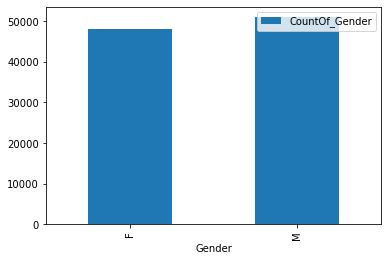

In [170]:
# 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

# frequency bars for categorical variables
df1 = Customer_Final.groupby("Gender")[["Gender"]].count().add_prefix("CountOf_")
df1.plot(kind = "bar")

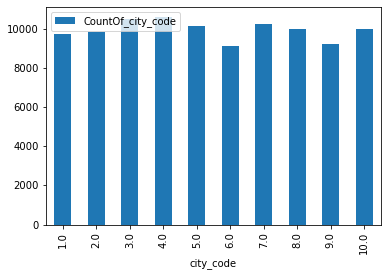

In [171]:
df2 = Customer_Final.groupby("city_code")[["city_code"]].count().add_prefix("CountOf_")
df2.plot(kind = "bar")

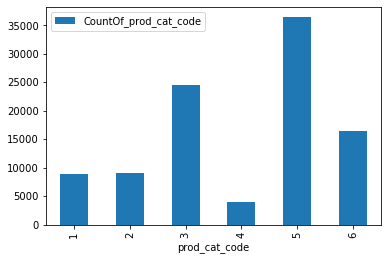

In [172]:
df3 = Customer_Final.groupby("prod_cat_code")[["prod_cat_code"]].count().add_prefix("CountOf_")
df3.plot(kind = "bar")

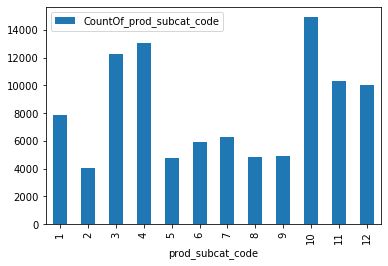

In [173]:
df4 = Customer_Final.groupby("prod_subcat_code")[["prod_subcat_code"]].count().add_prefix("CountOf_")
df4.plot(kind = "bar")

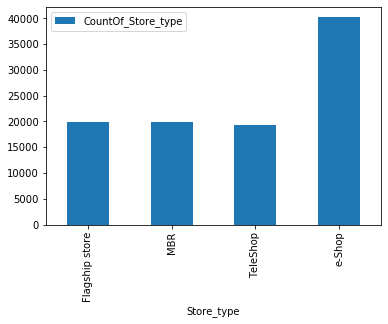

In [174]:
df5 = Customer_Final.groupby("Store_type")[["Store_type"]].count().add_prefix("CountOf_")
df5.plot(kind = "bar")

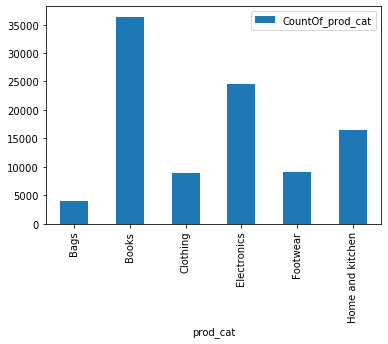

In [175]:
df6 = Customer_Final.groupby("prod_cat")[["prod_cat"]].count().add_prefix("CountOf_")
df6.plot(kind = "bar")

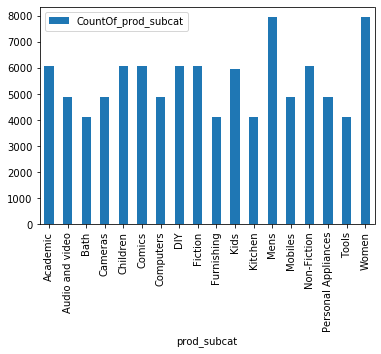

In [176]:
df7 = Customer_Final.groupby("prod_subcat")[["prod_subcat"]].count().add_prefix("CountOf_")
df7.plot(kind = "bar")

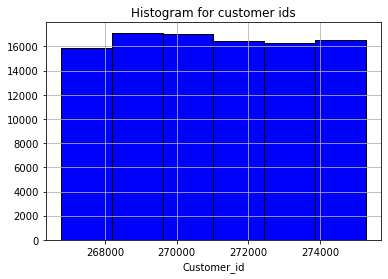

In [177]:
#3. Continuous variables histogram
from matplotlib import pyplot as plt
Customer_Final.customer_Id.hist(bins=6,color="blue",edgecolor="black")
plt.xlabel('Customer_id')
plt.title("Histogram for customer ids")
plt.show()

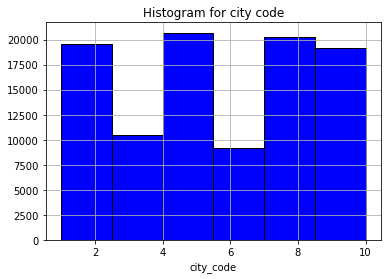

In [179]:
Customer_Final.city_code.hist(bins=6,color="blue",edgecolor="black")
plt.xlabel('city_code')
plt.title("Histogram for city code")
plt.show()

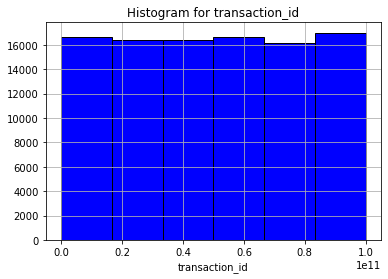

In [180]:
Customer_Final.transaction_id.hist(bins=6,color="blue",edgecolor="black")
plt.xlabel('transaction_id')
plt.title("Histogram for transaction_id")
plt.show()

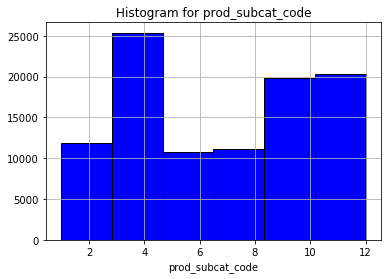

In [35]:
Customer_Final.prod_subcat_code.hist(bins=6,color="blue",edgecolor="black")
plt.xlabel('prod_subcat_code')
plt.title("Histogram for prod_subcat_code")
plt.show()

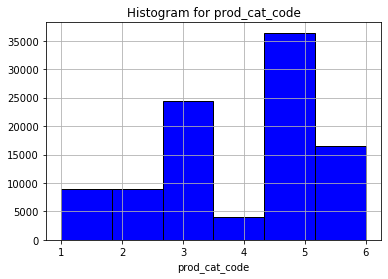

In [181]:
Customer_Final.prod_cat_code.hist(bins=6,color="blue",edgecolor="black")
plt.xlabel('prod_cat_code')
plt.title("Histogram for prod_cat_code")
plt.show()

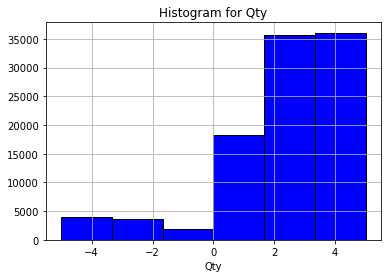

In [182]:
Customer_Final.Qty.hist(bins=6,color="blue",edgecolor="black")
plt.xlabel('Qty')
plt.title("Histogram for Qty")
plt.show()

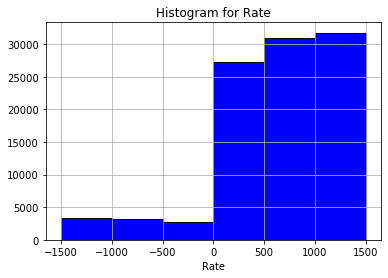

In [40]:
Customer_Final.Rate.hist(bins=6,color="blue",edgecolor="black")
plt.xlabel('Rate')
plt.title("Histogram for Rate")
plt.show()

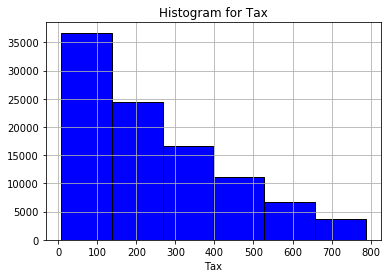

In [183]:
Customer_Final.Tax.hist(bins=6,color="blue",edgecolor="black")
plt.xlabel('Tax')
plt.title("Histogram for Tax")
plt.show()

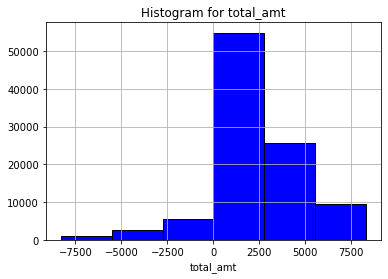

In [42]:
Customer_Final.total_amt.hist(bins=6,color="blue",edgecolor="black")
plt.xlabel('total_amt')
plt.title("Histogram for total_amt")
plt.show()

In [186]:
#4a. Calculate Time period of the available transaction data with merged dataset
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])
least_recent_date = Customer_Final['tran_date'].min()
recent_date = Customer_Final['tran_date'].max()
time_period = recent_date - least_recent_date
display(time_period)

Timedelta('1430 days 00:00:00')

In [187]:
#4b. Count of transactions where total amount of transaction was negative
(Customer_Final.total_amt.loc[Customer_Final.total_amt < 0]).count()

9294

In [188]:
#5. Which product categories are more popular among female vs male customers
male_customers = Customer_Final.loc[Customer_Final.Gender == 'M'].groupby(by=['prod_cat'])
male_customers1 = male_customers[['prod_cat']].count().add_prefix('CountOf_')
display(male_customers1[male_customers1['CountOf_prod_cat']==male_customers1['CountOf_prod_cat'].max()])

female_customers = Customer_Final.loc[Customer_Final.Gender == 'F'].groupby(by=['prod_cat'])
female_customers1 = female_customers[['prod_cat']].count().add_prefix('CountOf_')
display(female_customers1[female_customers1['CountOf_prod_cat']==female_customers1['CountOf_prod_cat'].max()])

,CountOf_prod_cat
prod_cat,
Books,18696


,CountOf_prod_cat
prod_cat,
Books,17694


In [189]:
#6. Which city code has the max customers and what was the percentage of customers from that city
grp = Customer_Final.loc[~Customer_Final.customer_Id.duplicated(),].groupby(by=['city_code'])
grp1 = grp[['city_code']].count().add_prefix('CountOf_')
max_customer = grp1[grp1['CountOf_city_code']==grp1['CountOf_city_code'].max()]
display(max_customer)

Percentage_Customers = max_customer/Customer_Final.customer_Id.loc[~Customer_Final.customer_Id.duplicated(),].count()
display(Percentage_Customers)

,CountOf_city_code
city_code,
3.0,576


,CountOf_city_code
city_code,
3.0,0.104613


In [190]:
#7. Which store type sells the maximum products by value and by quantity
grp1 = Customer_Final.groupby(['Store_type','prod_cat']).sum()
display(grp1[grp1['total_amt']==grp1['total_amt'].max()])

display(grp1[grp1['Qty']==grp1['Qty'].max()])

,,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
Store_type,prod_cat,,,,,,,,,,,
e-Shop,Books,3978983748,80286.0,740919502927368,3978983748,119544,73410,35844,9465642,3735152.19,31760663.61,119903


,,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
Store_type,prod_cat,,,,,,,,,,,
e-Shop,Books,3978983748,80286.0,740919502927368,3978983748,119544,73410,35844,9465642,3735152.19,31760663.61,119903


In [200]:
#8. What was the total amount earned from the 'Electronics' and 'Clothing' categories from Flagship stores
grp1 = Customer_Final.total_amt.loc[(Customer_Final.Store_type == 'Flagship store') & ((Customer_Final.prod_cat == 'Electronics') | (Customer_Final.prod_cat == 'Clothing'))].sum()
display(grp1)

14658949.89

In [201]:
#9. What was the total amount earned from "Male" customers under the "Electronics" category?
grp1 = Customer_Final.total_amt.loc[(Customer_Final.Gender == 'M') & (Customer_Final.prod_cat == 'Electronics')].sum()
display(grp1)

28515547.125

In [206]:
#10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?
grp1 = Customer_Final.loc[(~Customer_Final.total_amt.duplicated().count()>10) & (Customer_Final.total_amt >0)].count()
display(grp1)

customer_Id          0
DOB                  0
Gender               0
city_code            0
transaction_id       0
cust_id              0
tran_date            0
prod_subcat_code     0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [231]:
#11. For all customers aged between 25 - 35, find out:
#a. What was the total amount spent for “Electronics” and “Books” product categories?
from datetime import date
from datetime import datetime
today = date.today()
# display(today)

born = pd.to_datetime (Customer_Final.DOB)
display(born)
age = today.year - born.dt.year
# display(age)

grp1 = Customer_Final.total_amt.loc[(age>=25) & (age<=35) & ((Customer_Final.prod_cat == 'Electronics')|(Customer_Final.prod_cat == 'Books'))].groupby([Customer_Final.Store_type,Customer_Final.prod_cat]).sum()
display(grp1)



0       1970-02-01
1       1970-02-01
2       1970-02-01
3       1970-02-01
4       1970-02-01
           ...    
99288   1992-12-17
99289   1992-12-17
99290   1992-12-27
99291   1992-12-27
99292   1992-12-27
Name: DOB, Length: 99293, dtype: datetime64[ns]

Store_type      prod_cat   
Flagship store  Books          5.545445e+06
                Electronics    4.123545e+06
MBR             Books          5.321755e+06
                Electronics    3.775641e+06
TeleShop        Books          5.093358e+06
                Electronics    3.483071e+06
e-Shop          Books          1.001997e+07
                Electronics    7.778692e+06
Name: total_amt, dtype: float64

In [242]:
#b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?
grp1 = Customer_Final.total_amt.loc[(age>=25) & (age<=35) & 
                                    ((Customer_Final.prod_cat == 'Electronics')|(Customer_Final.prod_cat == 'Books')) & 
                                    ((Customer_Final.tran_date > pd.to_datetime('2014-01-01')) & (Customer_Final.tran_date > pd.to_datetime('2014-04-01')))].groupby([Customer_Final.Store_type,Customer_Final.prod_cat]).sum()
display(grp1)

Store_type      prod_cat   
Flagship store  Books          127494.900
                Electronics     66570.725
MBR             Books           80017.470
                Electronics     34442.850
TeleShop        Books           94033.290
                Electronics     74692.475
e-Shop          Books          100245.600
                Electronics     61902.100
Name: total_amt, dtype: float64